# Uso de matrices en Python

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Marzo de 2025

**Versión:** 1.0  

---

## Descripción

Las matrices son una de las estructuras de datos usadas en Machine Learning.

Además, explica el concepto de valor y vector propio que son conceptos muy útiles en la reducción de la dimensionalidad.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- matplotlib (3.10.0)
- numpy (1.26.4)
- sympy (1.13.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import numpy as np
print(np.__version__)
````

# Descripción de ejercicio

Ejecuta cada celda de código y explica las operaciones realizadas con matrices. Si es necesario, investiga los términos que desconoces.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [2]:
def dibuja_figura():
    """Crea la figura de pyplot y los ejes."""
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")

    return ax

In [3]:
def vector_plano(vector : np.array, color : str):
    """Genera el grafico de los vectores en el plano"""
    v = vector
    ax.annotate(" ", xy=v, xytext=[0, 0], color=color,
                arrowprops=dict(facecolor=color,
                                shrink=0,
                                alpha=0.7,
                                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], v)

# Matrices y sus operaciones

In [4]:
A = sp.Matrix( [[ 2,-3,-8, 7],
                   [-2,-1, 2,-7],
                   [ 1, 0,-3, 6]] )
print ("Matriz A")
print (A)
print(A.shape)
# Transpuesta
print ("Transpuesta de A")
print (A.transpose())
# transpuesta de transpuesta vuelve a A.
print ("Transpuesta de la transpuesta de A")
A.transpose().transpose()
# Creando matriz simetrica
As = A*A.transpose()
# Comprobando simetria.
print ("Transpuesta de As")
print (As.transpose())
# Matriz invertible
A = sp.Matrix( [[1,2],
                   [3,9]] )
print ("Matriz A")
print (A)
A_inv = A.inv()
print ("Inversa de A")
print (A_inv)


Matriz A
Matrix([[2, -3, -8, 7], [-2, -1, 2, -7], [1, 0, -3, 6]])
(3, 4)
Transpuesta de A
Matrix([[2, -2, 1], [-3, -1, 0], [-8, 2, -3], [7, -7, 6]])
Transpuesta de la transpuesta de A
Transpuesta de As
Matrix([[126, -66, 68], [-66, 58, -50], [68, -50, 46]])
Matriz A
Matrix([[1, 2], [3, 9]])
Inversa de A
Matrix([[3, -2/3], [-1, 1/3]])


In [5]:
# A * A_inv = I
A*A_inv
# Forma escalonada igual a indentidad.
A.rref()
# La inversa de A_inv es A
A_inv.inv()
# Resolviendo el sistema de ecuaciones.
A = np.array([[1.2, -2.2],
              [1.1, 1.4]])
b = np.array([0., 0.])

x = np.linalg.solve(A, b)
print (x)


[0. 0.]


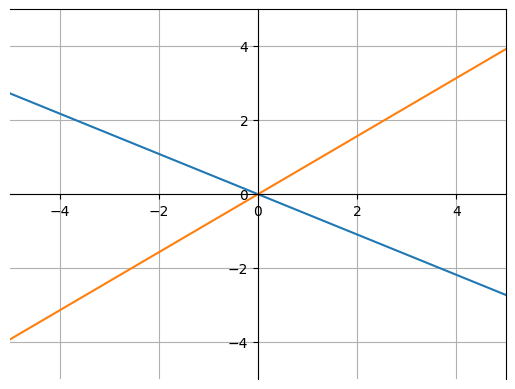

In [7]:
# Solución gráfica.
x_vals = np.linspace(-5, 5, 50) # crea 50 valores entre -5 y 5
ax = dibuja_figura()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid()
ax.plot(x_vals, (1.2 * x_vals) / -2.2) # gráfica 1.2x_1 - 2.2x_2 = 0
a = ax.plot(x_vals, (1.1 * x_vals) / 1.4) # gráfica 1.1x_1 + 1.4x_2 = 0

In [23]:
# Sympy para resolver el sistema de ecuaciones lineales
a1, a2, a3 = sp.symbols('a1, a2, a3')
A = sp.Matrix(( (3, 3, 3, 0), (2, 2, 2, 0), (2, 1, 0, 0), (3, 2, 1, 0) ))

print(sp.solve_linear_system(A, a1, a2, a3))

A = sp.Matrix(( (1, 1, 1, 0), (-2, 1, 1, 0), (-1, 2, 0, 0) ))
print(sp.solve_linear_system(A, a1, a2, a3))

# Calculando el rango con SymPy
A = sp.Matrix([[1, 1, 1, 4],
                  [1, 2, 1, 5],
                  [1, 1, 1, 6]])
# Rango con SymPy
print (A.rank())

{a1: a3, a2: -2*a3}
{a1: 0, a2: 0, a3: 0}
3


**❓ ¿Puede interpretar la solución del primer sistema: {a1: a3, a2: -2*a3}?**




In [15]:
# Calculando el rango con numpy
A = np.array([[1, 1, 1, 4],
              [1, 2, 1, 5],
              [1, 1, 1, 6]])

print (np.linalg.matrix_rank(A))

3


In [16]:
# Determinante con sympy
A = sp.Matrix( [[1, 2, 6],
                   [2,-2, 0],
                   [2, 3, 5]] )
print (A.det())


30


In [17]:
# Determinante con numpy
A = np.array([[1, 2, 6],
              [2, -2, 0],
              [2, 3, 5]] )
print (np.linalg.det(A))

29.99999999999999


# Valores y vectores propios

El concepto de **valor propio** y **vector propio** surge en el contexto de álgebra lineal, especialmente cuando se trabaja con matrices. :

### Valor Propio (Eigenvalue)

Un **valor propio** es un número que describe cuánto se "*escala*" un vector cuando se aplica una matriz sobre él. Matemáticamente, se dice que un valor $\lambda$ es un valor propio de una matriz $A$ si existe un vector no nulo $v$ tal que:

$A \cdot v = \lambda \cdot v$

Es decir, cuando se aplica la matriz $A$ al vector $v$, el vector solo se escala (se estira o se contrae) y no cambia de dirección. El número $\lambda$\ es el factor por el cual el vector es escalado.

### Vector Propio (Eigenvector)

Un **vector propio** es un vector no nulo que, cuando se aplica una matriz sobre él, solo cambia de magnitud, pero no de dirección. Dicho de otra forma, un vector propio es un vector $v$ tal que:

$A \cdot v = \lambda \cdot v$

Aquí, $v$ es el vector propio y $\lambda$ es el valor propio correspondiente. Los vectores propios pueden interpretarse como direcciones especiales en las que las transformaciones representadas por la matriz no "rotan" el vector, sino que solo lo escalan.

### Resumen:

- **Valor propio** $\lambda$: el factor de escala que describe cómo se estira o comprime un vector.
- **Vector propio** $v$: el vector que se mantiene en su dirección original (solo cambia su magnitud) tras la aplicación de una matriz.

In [18]:
# Valores_propios con numpy
A = np.array([[3, 2],
              [7, -2]])

x, v = np.linalg.eig(A)

In [19]:
# x valor_propio, v vector_propio
print ("valor propio y vector propio de A")
print (x, v)

valor propio y vector propio de A
[ 5. -4.] [[ 0.70710678 -0.27472113]
 [ 0.70710678  0.96152395]]


In [20]:
# valores_propios con SymPy
A = sp.Matrix([[3, 2],
                  [7, -2]])

In [21]:
# Valores_propios
print (A)
print ("valores propios")
print (A.eigenvals())
print ("vectores propios")
# vector_propio
print (A.eigenvects())

Matrix([[3, 2], [7, -2]])
valores propios
{5: 1, -4: 1}
vectores propios
[(-4, 1, [Matrix([
[-2/7],
[   1]])]), (5, 1, [Matrix([
[1],
[1]])])]
